In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('classic')
import pandas_ta as ta


In [6]:
df = yf.download(tickers = 'ETH-USD', start = '2022-08-01', end = '2022-08-25', interval = '1D')

[*********************100%***********************]  1 of 1 completed


In [7]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-31,1695.884766,1745.883179,1672.612793,1681.517334,1681.517334,14200735370
2022-08-01,1681.445557,1700.170898,1613.416016,1635.195801,1635.195801,16191371176
2022-08-02,1634.645874,1672.629761,1567.851074,1632.945435,1632.945435,20426082309
2022-08-03,1633.051270,1678.098267,1595.634521,1618.874512,1618.874512,16786218830
2022-08-04,1618.886719,1658.511597,1585.326538,1608.205811,1608.205811,14467440626
2022-08-05,1607.523926,1732.254639,1606.497070,1732.254639,1732.254639,18546491876
2022-08-06,1732.661133,1744.326416,1691.658081,1691.658081,1691.658081,11757911705
2022-08-07,1691.777954,1724.789185,1672.908447,1699.350830,1699.350830,10252090340
2022-08-08,1699.693481,1806.886475,1697.407959,1775.516113,1775.516113,16841424404


In [8]:
df['Percent'] = (df['High'] / df['Low'] -1)
df.drop('Volume', axis=1, inplace=True)
df

,Open,High,Low,Close,Adj Close,Percent
Date,,,,,,
2022-07-31,1695.884766,1745.883179,1672.612793,1681.517334,1681.517334,0.043806
2022-08-01,1681.445557,1700.170898,1613.416016,1635.195801,1635.195801,0.053771
2022-08-02,1634.645874,1672.629761,1567.851074,1632.945435,1632.945435,0.066829
2022-08-03,1633.051270,1678.098267,1595.634521,1618.874512,1618.874512,0.051681
2022-08-04,1618.886719,1658.511597,1585.326538,1608.205811,1608.205811,0.046164
2022-08-05,1607.523926,1732.254639,1606.497070,1732.254639,1732.254639,0.078281
2022-08-06,1732.661133,1744.326416,1691.658081,1691.658081,1691.658081,0.031134
2022-08-07,1691.777954,1724.789185,1672.908447,1699.350830,1699.350830,0.031012
2022-08-08,1699.693481,1806.886475,1697.407959,1775.516113,1775.516113,0.064497


In [9]:
df = df.replace(0, np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25 entries, 2022-07-31 to 2022-08-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       25 non-null     float64
 1   High       25 non-null     float64
 2   Low        25 non-null     float64
 3   Close      25 non-null     float64
 4   Adj Close  25 non-null     float64
 5   Percent    25 non-null     float64
dtypes: float64(6)
memory usage: 1.4 KB


In [10]:
df.Percent.dropna(inplace = True)
df.describe()

,Open,High,Low,Close,Adj Close,Percent
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1745.549087,1796.135400,1697.904683,1744.036616,1744.036616,0.058491
std,126.789794,131.338310,131.504412,127.613164,127.613164,0.027532
min,1576.543579,1622.778809,1534.298828,1577.003784,1577.003784,0.026028
25%,1633.051270,1678.098267,1595.634521,1632.945435,1632.945435,0.043806
50%,1699.693481,1745.883179,1672.612793,1699.350830,1699.350830,0.053771
75%,1851.828369,1910.745361,1826.957764,1851.742676,1851.742676,0.066612
max,1981.782471,2022.791504,1948.595215,1981.336548,1981.336548,0.146311


In [7]:
df.nlargest(25,'Percent').describe()


,Open,High,Low,Close,Adj Close,Percent
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,28.542400,30.900400,24.975200,27.305600,27.305600,0.263939
std,23.664742,23.427376,19.670213,20.063224,20.063224,0.110182
min,12.960000,13.690000,10.070000,12.340000,12.340000,0.155004
25%,19.110001,20.219999,17.309999,18.840000,18.840000,0.166914
50%,22.520000,26.740000,20.799999,23.360001,23.360001,0.238520
75%,26.340000,28.360001,23.520000,25.320000,25.320000,0.324388
max,124.660004,126.839996,103.629997,108.699997,108.699997,0.576998


In [11]:
df.nsmallest(30, 'Percent').describe()

,Open,High,Low,Close,Adj Close,Percent
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,60.880000,62.196000,58.555000,59.940000,59.940000,-0.098496
std,17.435901,13.715141,24.462681,21.669837,21.669837,0.420811
min,-14.000000,13.860000,-40.320000,-37.630001,-37.630001,-1.827957
25%,60.465000,60.867500,60.192499,60.667500,60.667500,0.010392
50%,63.580000,63.915001,63.275000,63.785000,63.785000,0.011298
75%,68.480000,68.817501,68.164997,68.677502,68.677502,0.012022
max,78.339996,78.650002,77.760002,78.029999,78.029999,0.012600


<AxesSubplot:xlabel='Date'>

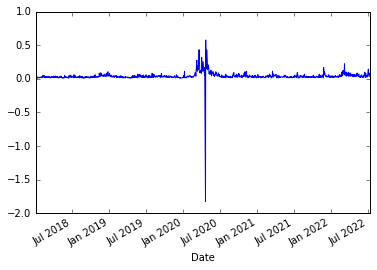

In [12]:
df.Percent.plot()

In [13]:
df.drop(index=df.nlargest(25, 'Percent').index, inplace=True)
df.drop(index=df.nsmallest(25,'Percent').index, inplace=True)
df

,Open,High,Low,Close,Adj Close,Percent
Date,,,,,,
2018-01-03,60.389999,61.970001,60.279999,61.630001,61.630001,0.028036
2018-01-05,61.900002,62.040001,61.090000,61.439999,61.439999,0.015551
2018-01-09,61.919998,63.480000,61.799999,62.959999,62.959999,0.027184
2018-01-11,63.500000,64.769997,63.430000,63.799999,63.799999,0.021126
2018-01-12,63.570000,64.500000,63.060001,64.300003,64.300003,0.022835
...,...,...,...,...,...,...
2022-07-11,104.790001,105.050003,100.889999,104.089996,104.089996,0.041233
2022-07-12,103.459999,103.489998,95.349998,95.839996,95.839996,0.085370
2022-07-13,95.889999,97.959999,93.669998,96.300003,96.300003,0.045799


In [14]:
df.describe()

,Open,High,Low,Close,Adj Close,Percent
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000
mean,63.448601,64.562751,62.297761,63.491252,63.491252,0.036963
std,18.789795,19.241143,18.332799,18.812617,18.812617,0.021661
min,16.780001,17.969999,15.640000,16.940001,16.940001,0.012380
25%,52.882501,53.742501,52.032499,52.820001,52.820001,0.022675
50%,61.665001,62.530001,60.799999,61.680000,61.680000,0.030183
75%,70.484997,71.619997,69.542501,70.664997,70.664997,0.043779
max,122.430000,130.500000,120.790001,123.699997,123.699997,0.148977


<AxesSubplot:xlabel='Date'>

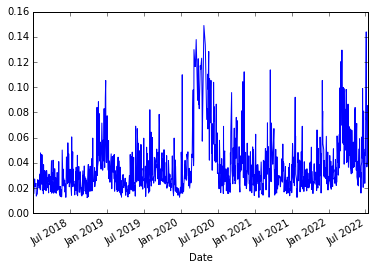

In [15]:
df.Percent.plot()